In [29]:
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dropout,Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
import tensorflow as tf
import cv2
import numpy as np
import os

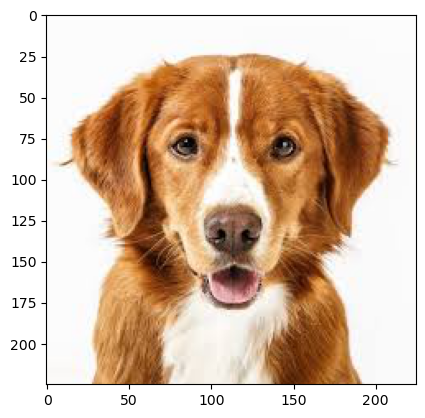

In [30]:
img=image.load_img("C:\\AI(ml&dl)\\DATASETS\\Tom & Dog\\train\\dog\\download (2).jpeg")
plt.imshow(img)

In [31]:
img=cv2.imread("C:\\AI(ml&dl)\\DATASETS\\Tom & Dog\\train\\dog\\download (2).jpeg")
img.shape

(225, 225, 3)

In [32]:
train=ImageDataGenerator(rescale=None,
                        shear_range=0.2,
                         zoom_range=0.2,
                         horizontal_flip=True)
validation=ImageDataGenerator(rescale=1./255)

In [33]:
train_set=train.flow_from_directory("C:\\AI(ml&dl)\\DATASETS\\Tom & Dog\\train",
                                   target_size=(200,200),
                                   batch_size=3,
                                   class_mode='binary')
validation_set=validation.flow_from_directory("C:\\AI(ml&dl)\\DATASETS\\Tom & Dog\\valid",
                                             target_size=(200,200),
                                             batch_size=3,
                                             class_mode='binary')

Found 10 images belonging to 2 classes.
Found 10 images belonging to 2 classes.


In [34]:
train_set.class_indices

{'dog': 0, 'tom': 1}

In [35]:
model=Sequential()
model.add(Conv2D(16,(3,3),activation='relu',input_shape=(200,200,3)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))


model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dense(1,activation='sigmoid'))


In [36]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [37]:
model_fit=model.fit(train_set,
                    steps_per_epoch=3,
                    epochs=25,
                   validation_data=validation_set)

Epoch 1/25
3/3 [==============================] - 3s 477ms/step - loss: 1014.5718 - accuracy: 0.2857 - val_loss: 1.6066 - val_accuracy: 0.5000
Epoch 2/25
3/3 [==============================] - 1s 454ms/step - loss: 387.8251 - accuracy: 0.4286 - val_loss: 1.1437 - val_accuracy: 0.5000
Epoch 3/25
3/3 [==============================] - 1s 449ms/step - loss: 213.2117 - accuracy: 0.4444 - val_loss: 0.6194 - val_accuracy: 0.8000
Epoch 4/25
3/3 [==============================] - 1s 347ms/step - loss: 54.7459 - accuracy: 0.5714 - val_loss: 0.6328 - val_accuracy: 0.6000
Epoch 5/25
3/3 [==============================] - 1s 483ms/step - loss: 14.4674 - accuracy: 0.6667 - val_loss: 0.6048 - val_accuracy: 0.5000
Epoch 6/25
3/3 [==============================] - 1s 341ms/step - loss: 13.8873 - accuracy: 0.5714 - val_loss: 0.5995 - val_accuracy: 0.8000
Epoch 7/25
3/3 [==============================] - 1s 393ms/step - loss: 15.7492 - accuracy: 0.7143 - val_loss: 0.5771 - val_accuracy: 0.9000
Epoch 8/2

In [38]:
validation_set.class_indices

{'dog': 0, 'tom': 1}

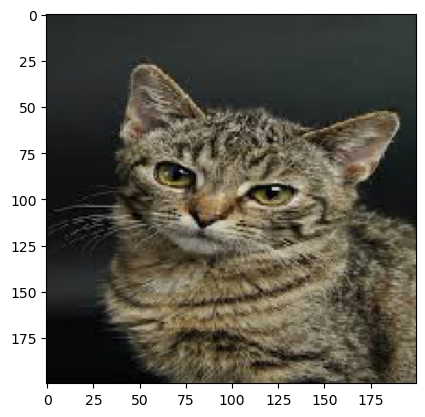

1/1 [==============================] - 0s 154ms/step
tom


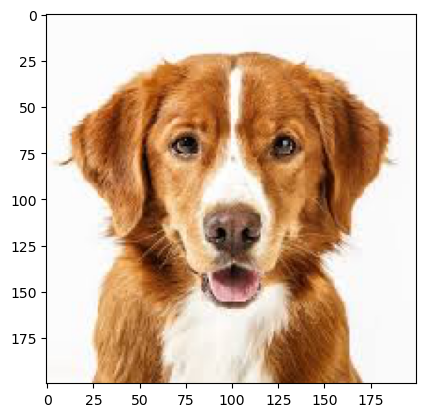

1/1 [==============================] - 0s 81ms/step
dog


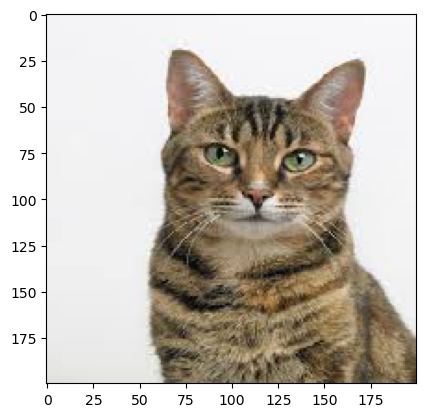

1/1 [==============================] - 0s 62ms/step
tom


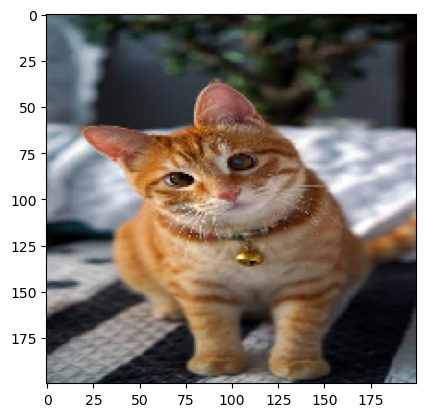

1/1 [==============================] - 0s 54ms/step
tom


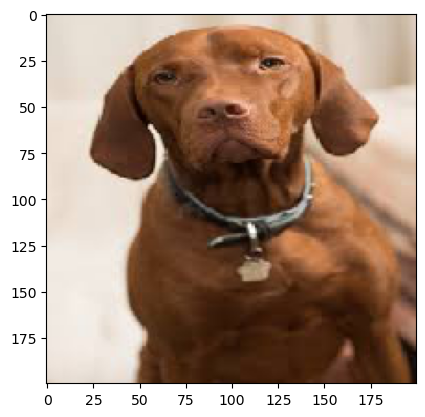

1/1 [==============================] - 0s 76ms/step
dog


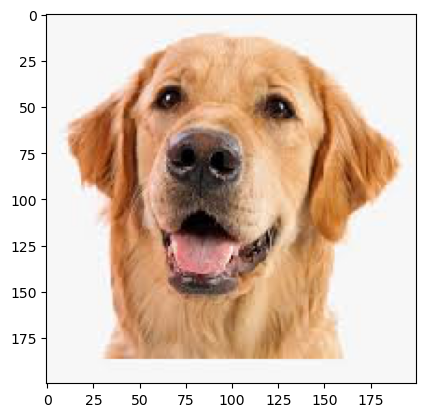

1/1 [==============================] - 0s 50ms/step
dog


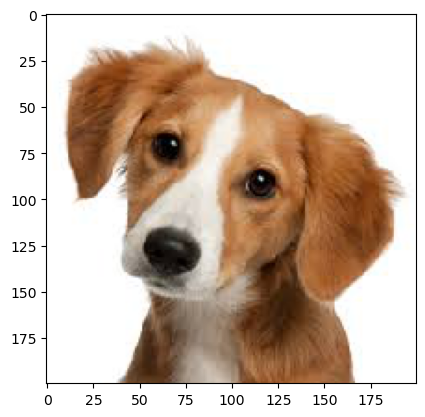

1/1 [==============================] - 0s 63ms/step
dog


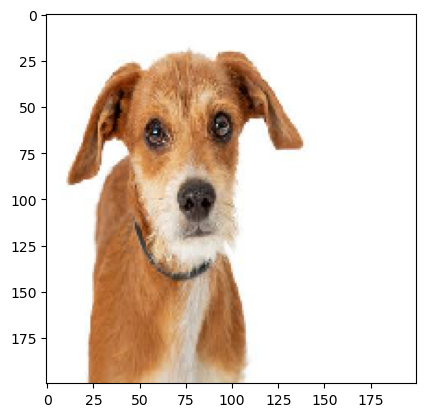

1/1 [==============================] - 0s 68ms/step
dog


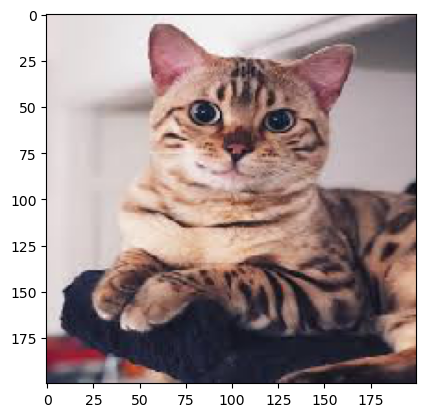

1/1 [==============================] - 0s 52ms/step
tom


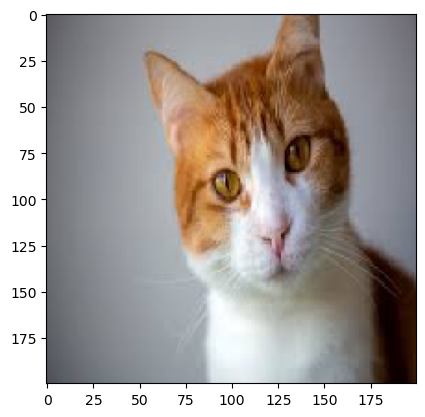

1/1 [==============================] - 0s 65ms/step
tom


In [39]:
dir_path="C:\\AI(ml&dl)\\DATASETS\\Tom & Dog\\test"
for i in os.listdir(dir_path):
    img=image.load_img(dir_path+'//'+i,target_size=(200,200))
    plt.imshow(img)
    plt.show()
    
    x=image.img_to_array(img)
    x=np.expand_dims(x,axis=0)
    
    images=np.vstack([x])
    val=model.predict(images)
    
    if val==0:
        print('dog')
        
    else:
        print('tom')

